In [95]:
import pandas as pd

#Prepare DataFrame
df = pd.read_csv('../data/BCCC-CIRA-CIC-DoHBrw-2020.csv')


In [96]:
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder

# Explorative Data Analysis

# Check for null values
#print(df.isnull().sum())

# Fill null values with mean
if df.isnull().sum().sum() > 0:
    df = df.fillna(df.mean())

# Encode categorical data
encoder = LabelEncoder()
df['Label'] = encoder.fit_transform(df['Label'])

print(df['Label'].head())
print(encoder.classes_)

df.describe()


0    0
1    1
2    1
3    0
4    0
Name: Label, dtype: int32
['Benign' 'Malicious']


,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,PacketLengthSkewFromMedian,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
count,4.991060e+05,4.991060e+05,4.991060e+05,4.991060e+05,4.991060e+05,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,...,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000
mean,4.020093e+04,4.733915e+04,4.250156e+04,3.166829e+04,9.263585e+04,220.169083,173.159814,95.472702,70.749953,0.442934,...,0.972995,1.711825,0.319586,0.442021,0.394671,0.205894,-0.968984,-0.060800,1.114611,0.500000
std,1.439617e+05,4.212751e+05,1.393927e+05,2.566805e+05,1.534938e+05,210.141825,85.506490,32.999740,14.830277,1.551998,...,0.520212,11.106412,1.244031,2.071807,2.351233,1.724873,3.163775,3.198770,1.735820,0.500001
min,5.500000e+01,1.464903e+00,5.400000e+01,1.576245e+00,0.000000e+00,0.000000,56.000000,54.000000,54.000000,-10.000000,...,0.077182,0.000000,0.000000,0.000005,0.000002,-0.000001,-10.000000,-10.000000,0.000000,0.000000
25%,6.180000e+02,5.410781e+01,4.760000e+02,1.418128e+02,4.692099e+02,21.661253,92.000000,76.000000,66.000000,0.199848,...,0.577836,0.000021,0.004454,0.010538,0.012238,0.000016,-1.797168,0.393686,0.552687,0.000000
50%,1.807000e+03,3.640969e+02,4.827000e+03,4.611146e+02,1.826789e+04,135.142971,152.488283,87.000000,68.000000,0.986397,...,0.748184,0.000079,0.008820,0.015148,0.015407,0.000034,0.000000,0.908002,0.800649,0.500000
75%,5.542000e+03,3.810260e+03,7.888000e+03,4.215498e+03,1.415989e+05,376.296309,228.758621,105.000000,68.000000,1.201609,...,1.516263,0.000357,0.018640,0.024903,0.016300,0.015161,0.936908,1.305393,1.208105,1.000000
max,8.015359e+06,2.304348e+07,7.723184e+06,7.600000e+06,1.578115e+06,1256.230616,689.800000,317.000000,553.000000,2.932375,...,5.616085,647.245330,25.441017,28.017596,28.017596,28.017596,2.970716,5.428781,66.309747,1.000000


In [97]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Divide Data

# Target variable is 'Label'
X = df.drop('Label', axis=1)
y = df['Label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### Decision Tree

A Decision Tree is a type of supervised learning algorithm that is mostly used for classification problems. 

It works for both categorical and continuous input and output variables. 

In this technique, we split the population into two or more homogeneous sets based on the most significant attributes/ input variables. 

A decision tree simply asks a question, and based on the answer (Yes/No), it further splits the tree into subtrees.

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Decision Tree model

tree_model = DecisionTreeClassifier()


In [99]:
# Define parameters for grid search
param_grid_tree = {
    'max_depth': [3, 5],
    'min_samples_split': [5, 10]
}

# Grid search to find best params
grid_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid_tree, 
                           cv=2, scoring='accuracy', verbose=1, n_jobs=-1)

# cv represents K in K-Fold cross validation


In [100]:

# Search for the best params using all data
grid_tree.fit(X, y)

# Final model with best params
tree_best_model = grid_tree.best_estimator_

# Print best params
print("Best params for tree model: ", grid_tree.best_params_)

# Train final model with best params using train data
tree_best_model.fit(X_train, y_train)



Fitting 2 folds for each of 4 candidates, totalling 8 fits
Best params for tree model:  {'max_depth': 5, 'min_samples_split': 5}


DecisionTreeClassifier(max_depth=5, min_samples_split=5)

In [101]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluate Decision Tree Model

# Decision Tree Performance
tree_pred = tree_best_model.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_pred)
tree_report = classification_report(y_test, tree_pred, output_dict=True)

tree_precision = tree_report['weighted avg']['precision']
tree_recall = tree_report['weighted avg']['recall']
tree_f1 = tree_report['weighted avg']['f1-score']

# Print results
print("Tree Confusion Matrix:\n", confusion_matrix(y_test, tree_pred))
print("Tree Accuracy:\n", tree_accuracy)
print("Classification Report:\n", classification_report(y_test, tree_pred))


Tree Confusion Matrix:
 [[49634   295]
 [  142 49751]]
Tree Accuracy:
 0.9956222075294023
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     49929
           1       0.99      1.00      1.00     49893

    accuracy                           1.00     99822
   macro avg       1.00      1.00      1.00     99822
weighted avg       1.00      1.00      1.00     99822



### Random Forest

Random Forest is an ensemble machine learning algorithm that follows the bagging technique. 

It is an extension of the decision tree algorithm. 

It creates a set of decision trees from a randomly selected subset of the training set and then aggregates the votes from different decision trees to decide the final class of the test object. 

This technique of combining the prediction from multiple models helps to overcome the problem of overfitting in decision trees and improves the overall prediction accuracy.

In [102]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model

best_max_depth = tree_best_model.max_depth
best_min_samples_split = tree_best_model.min_samples_split

forest_model = RandomForestClassifier(max_depth=best_max_depth, 
                                      min_samples_split=best_min_samples_split)


In [103]:
# Define parameters for grid search
param_grid_forest = {
    'n_estimators': [50, 100] # number of trees in the forest
}

# Grid search to find best params
grid_forest = GridSearchCV(estimator=forest_model, param_grid=param_grid_forest,
                            cv=2, scoring='accuracy', verbose=1, n_jobs=-1)


In [104]:
# Search for the best params using all data
grid_forest.fit(X, y)

# Final model with best params
forest_best_model = grid_forest.best_estimator_

# Print best params
print("Best params for forest model: ", grid_forest.best_params_)

# Train final model with best params using train data
forest_best_model.fit(X_train, y_train)



Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best params for forest model:  {'n_estimators': 50}


RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=50)

In [105]:
# Evaluate Random Forest Model

# cv represents K in K-Fold cross validation

# Random Forest Performance
forest_pred = forest_best_model.predict(X_test)
forest_accuracy = accuracy_score(y_test, forest_pred)
forest_report = classification_report(y_test, forest_pred, output_dict=True)

forest_precision = forest_report['weighted avg']['precision']
forest_recall = forest_report['weighted avg']['recall']
forest_f1 = forest_report['weighted avg']['f1-score']

# Print results
print("Forest Confusion Matrix:\n", confusion_matrix(y_test, forest_pred))
print("Forest Accuracy:\n", forest_accuracy)
print("Classification Report:\n", classification_report(y_test, forest_pred))


Forest Confusion Matrix:
 [[49132   797]
 [  448 49445]]
Forest Accuracy:
 0.9875277994830799
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99     49929
           1       0.98      0.99      0.99     49893

    accuracy                           0.99     99822
   macro avg       0.99      0.99      0.99     99822
weighted avg       0.99      0.99      0.99     99822



### SGDClassifier
A linear classification model that uses Stochastic Gradient Descent (SGD) as its training method.

In the SGDClassifier, the gradient of the loss function is estimated for each sample at a time and the model is updated along the way with a decreasing learning rate. This makes the SGDClassifier efficient and easy to implement, especially when dealing with large datasets.

The SGDClassifier supports different loss functions and penalties, which makes it versatile for handling various types of data and classification problems. However, it requires careful tuning of its hyperparameters, such as the learning rate and the regularization term, and it may be sensitive to feature scaling.

In [106]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

# SGD stands for Stochastic Gradient Descent

# Create the SGDClassifier model
sgd_model = SGDClassifier(max_iter=1000, tol=1e-3)

# Define parameters for grid search
param_grid = {
    'loss': ['log_loss', 'modified_huber'],
    'penalty': ['elasticnet'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['invscaling', 'adaptive', 'optimal'],
    'eta0': [ 0.1]
}

grid_sgd = GridSearchCV(sgd_model, param_grid, cv=2, scoring='accuracy', verbose=1, n_jobs=-1)

# Search for the best params using all data
grid_sgd.fit(X, y)

# Final model with best params
sgd_best_model = grid_sgd.best_estimator_

print("Best params for SGD model: ", grid_sgd.best_params_)

# Train final model with best params using train data
sgd_best_model.fit(X_train, y_train)



Fitting 2 folds for each of 12 candidates, totalling 24 fits
Best params for SGD model:  {'alpha': 0.0001, 'eta0': 0.1, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'penalty': 'elasticnet'}


SGDClassifier(eta0=0.1, loss='modified_huber', penalty='elasticnet')

In [107]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluate SGD Model

# SGD Performance
sgd_pred = sgd_best_model.predict(X_test)
sgd_accuracy = accuracy_score(y_test, sgd_pred)
sgd_report = classification_report(y_test, sgd_pred, output_dict=True)

sgd_precision = sgd_report['weighted avg']['precision']
sgd_recall = sgd_report['weighted avg']['recall']
sgd_f1 = sgd_report['weighted avg']['f1-score']

# Print results
print("SGD Confusion Matrix:\n", confusion_matrix(y_test, sgd_pred))
print("SGD Accuracy:\n", sgd_accuracy)
print("Classification Report:\n", classification_report(y_test, sgd_pred))

SGD Confusion Matrix:
 [[35286 14643]
 [ 4132 45761]]
SGD Accuracy:
 0.8119152090721484
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.71      0.79     49929
           1       0.76      0.92      0.83     49893

    accuracy                           0.81     99822
   macro avg       0.83      0.81      0.81     99822
weighted avg       0.83      0.81      0.81     99822



### K-Nearest Neighbours Algorithm

In [108]:
sample_size = int(len(df) / 45)  # Specify the desired sample size
print("Sample size: " + str(sample_size))
df_sample = df.sample(n=sample_size, random_state=13)  # Randomly sample 'sample_size' number of rows

print(encoder.classes_)

df_sample.describe()
#df_sample.head()  #Displaying first five rows of the dataset

Sample size: 11091
['Benign' 'Malicious']


,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,PacketLengthSkewFromMedian,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
count,1.109100e+04,1.109100e+04,1.109100e+04,1.109100e+04,1.109100e+04,11091.000000,11091.000000,11091.000000,11091.000000,11091.000000,...,11091.000000,11091.000000,11091.000000,11091.000000,11091.000000,11091.000000,11091.000000,11091.000000,11091.000000,11091.000000
mean,3.977599e+04,4.839952e+04,4.205765e+04,3.245092e+04,9.316694e+04,219.788588,172.843818,94.825603,70.695970,0.449191,...,0.975363,1.648877,0.313990,0.457290,0.406550,0.227879,-1.012756,-0.081031,1.104810,0.492381
std,1.586920e+05,4.246503e+05,1.394485e+05,2.605488e+05,1.564252e+05,211.806057,86.728905,32.088784,14.541817,1.549672,...,0.520421,10.366514,1.217782,2.134924,2.389304,1.822809,3.199509,3.248361,1.862287,0.499964
min,5.500000e+01,1.488526e+00,5.400000e+01,1.576258e+00,0.000000e+00,0.000000,56.000000,54.000000,54.000000,-10.000000,...,0.101544,0.000000,0.000000,0.000007,0.000003,0.000000,-10.000000,-10.000000,0.000000,0.000000
25%,6.180000e+02,5.417957e+01,4.580000e+02,1.417620e+02,4.692099e+02,21.661253,92.000000,76.000000,66.000000,0.204922,...,0.578226,0.000016,0.003774,0.010604,0.012392,0.000016,-1.805785,0.409517,0.529790,0.000000
50%,1.807000e+03,3.677526e+02,4.827000e+03,4.314236e+02,1.798912e+04,134.123537,151.950908,87.000000,68.000000,0.986397,...,0.757208,0.000076,0.008696,0.015145,0.015408,0.000034,-0.027153,0.926987,0.797760,0.000000
75%,5.292000e+03,3.651169e+03,7.729000e+03,4.213958e+03,1.421989e+05,377.092628,228.758621,105.000000,68.000000,1.201609,...,1.515429,0.000326,0.017899,0.024971,0.016556,0.015098,0.905956,1.307290,1.187231,1.000000
max,6.209568e+06,6.176471e+06,4.293889e+06,3.882353e+06,1.369730e+06,1170.354496,586.833333,287.000000,213.000000,2.879882,...,4.171592,144.281231,11.972824,28.017596,28.017596,28.017596,2.770685,3.558791,58.760508,1.000000


#### Train-Test Split

In [109]:
import numpy as np

np.random.seed(1)
msk = np.random.rand(
    len(df_sample)) < 0.5  #An array containing True(with probability 0.5) and False
train = df_sample[msk]  #Rows having array value true
test = df_sample[~msk]  #Rows having array value False
print('Number of observations in the training data: ', len(train))
print('Number of observations in the test data: ', len(test))

Number of observations in the training data:  5514
Number of observations in the test data:  5577


In [110]:
train.head()

,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,PacketLengthSkewFromMedian,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
44565,171,2579.556192,171,2579.556192,380.250000,19.500000,85.500000,85.5,66,0.000000,...,0.814335,0.000000e+00,0.000000,0.025227,0.025227,0.025227,-10.000000,-10.000000,0.000000,0
82229,1085,2732.605142,4099,10323.454819,215000.869806,463.681863,272.842105,68.0,68,1.325319,...,0.807566,9.919523e-05,0.009960,0.009760,0.007710,0.000003,0.617590,0.979633,1.020476,1
63378,110,2.441408,132,2.929690,30.250000,5.500000,60.500000,60.5,55,0.000000,...,0.999444,1.066619e-09,0.000032,0.025048,0.025048,0.025015,0.000000,1.000000,0.001295,0
238800,293125,2496.034998,169118,1440.083400,14389.935956,119.958059,166.095221,68.0,68,2.453238,...,0.582091,3.346842e-10,0.000018,0.000036,0.000038,0.000038,-0.361898,-0.120633,0.511115,1
395083,353,82.875157,327,76.771038,487.750000,22.085063,85.000000,78.0,66,0.950869,...,0.577349,1.446222e-09,0.000038,0.000053,0.000032,0.000020,1.630325,0.858988,0.718952,0


In [111]:
test.head()

,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,PacketLengthSkewFromMedian,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
419667,21253,1791.528294,20084,1680.815713,21633.071300,147.080476,154.081819,114.0,115,0.817630,...,0.642373,0.001120,0.030383,0.020175,0.014658,0.000048,0.589664,0.792956,1.495806,0
188161,1713,56.879651,4513,149.852811,157687.878400,397.099331,249.040000,85.0,54,1.239287,...,1.984219,0.000033,0.005743,0.012714,0.015640,0.000324,-1.521796,2.162560,0.452972,0
430708,4240,16431.472789,5281,20466.396338,14223.433452,119.255982,147.189859,105.0,66,1.060667,...,0.470846,0.000081,0.009007,0.010012,0.010543,0.000008,-0.177540,1.110599,0.900182,0
185640,171,10953.814618,105,6726.026520,338.000000,18.384776,92.000000,105.0,105,-2.121320,...,0.707107,0.000000,0.000000,0.015591,0.015591,0.015591,-10.000000,-10.000000,0.000000,0
303468,28669,238.383453,46671,388.070533,22288.089011,149.291959,130.120898,87.0,56,0.866508,...,0.548779,0.000081,0.008990,0.008740,0.010972,0.000009,-0.744985,0.971201,1.028592,1


#### Euclidean distance

In [112]:
import math

def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

#### Calculating the Nearest Neighbors

In [113]:
import operator

def getNeighbors(trainingSet, testInstance, k):
    distances = []  #List to store all the distance values
    length = len(testInstance) - 1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)  #Calculating the Euclidean Distance
        distances.append((trainingSet[x],dist))  #Appending the distance values to the 'distance' list
    distances.sort(key=operator.itemgetter(1))  #Sorting based on the disance value
    neighbors = []  #List to store all the neighbors
    for x in range(k):
        neighbors.append(distances[x][0])  #Number of neighbors is dependent on the value of k
    return neighbors

In [114]:
def getResponse(neighbors):
    classVotes = {}  #Dictionary to store labels with their counts
    for x in range(len(neighbors)):
        response = neighbors[x][-1]  #Label value of the neighbors
        if response in classVotes:
            classVotes[response] += 1  #if label value is already present increment it by 1
        else:
            classVotes[response] = 1  #If the label value is not yet present add it to the dictionary
    sortedVotes = sorted(
        classVotes.items(), key=operator.itemgetter(1), reverse=True
    )  #Sort the dictinary based on the count value in descending order
    return sortedVotes[0][0]  #Return the label with highest number of occurences

#### Calculating the accuracy

In [115]:
def getAccuracy(testSet, predictions):
    correct = 0  #Variable to store the correct predictions
    for x in range(len(testSet)):
        if testSet[x][-1] is predictions[x]:  #Checking whether the predicted value is same as label value
            correct += 1  #Incremented when both values are same
    return (correct / float(len(testSet))) * 100.0  #Accuracy = No. of Correct pred / Total number of pred

#### Implementation

In [116]:
predictions = []  #List to store the predicted values
k = 3  # 3-Nearest Neighbors
trainingSet = train.values.tolist()  #List containing training data
testSet = test.values.tolist()  #List containing test data
for x in range(len(testSet)):
    neighbors = getNeighbors(trainingSet, testSet[x], k)
    result = getResponse(neighbors)
    predictions.append(result)  # Storing the predicted values
    # print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))

#### Metrics for performance evaluation

In [ ]:
print("Confusion Matrix")
y_test_knn = []
for i in testSet:
    y_test_knn.append(i[-1])
from sklearn.metrics import confusion_matrix, accuracy_score
res = confusion_matrix(y_test_knn, predictions)
print(res)
print("\n\n")

knn_accuracy = accuracy_score(y_test_knn, predictions)
print('Accuracy: ' + repr(knn_accuracy) + '%')

TP = res[0, 0]
FP = res[0, 1]
FN = res[1, 0]
TN = res[1, 1]

knn_precision = TP / (TP + FP)
print('Precision: ' + repr(knn_precision))

knn_recall = TP / (TP + FN)
print('Recall: ' + repr(knn_recall))

knn_f1 = 2 * TP / (2 * TP + FP + FN)
print('F1-score: ' + repr(knn_f1))

Confusion Matrix
[[2759  137]
 [  96 2585]]



Accuracy: 0.9582212659135736%
Precision: 0.9526933701657458
Recall: 0.9663747810858143
F1-score: 0.9594853069031473


## Neural Networks

In [122]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

# Define the neural network model with regularization
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


ModuleNotFoundError: No module named 'distutils'

In [ ]:
# Evaluate the model
loss, accuracy_nn = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy_nn}')

In [ ]:
# Plot training & validation accuracy and loss values
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

### Grid Search

Grid Search is a hyperparameter tuning technique used to find the optimal hyperparameters for a model. 

It works by defining a grid of parameters that will be searched using K-fold cross-validation. 

Essentially, the Grid Search technique exhaustively tries every combination of the provided hyper-parameter values in order to find the best model. 

After training for each combination, it then selects the hyperparameter values that yield the model with the best performance.

While it can be computationally expensive due to the potentially large number of combinations, Grid Search ensures the highest possible performance of a model by using the optimal hyperparameters.

### Metrics for Comparison
**Precision**: The ratio of correct positive identifications (true positives) to all positive identifications (true positives + false positives). Useful when the cost of false positives is high.

**Recall (Sensitivity)**: The ratio of true positives identified among all actual positive cases in the dataset. Important when it's crucial to identify all positive cases.

**F1-Score**: The harmonic mean of precision and recall. A metric that balances precision and recall, especially useful when classes are imbalanced.

**Confusion Matrix**: A table that shows the true positives, false positives, true negatives, and false negatives. It allows for a more detailed analysis of the model's behavior in relation to different classes

### ROC AUC Curve

A Receiver Operating Characteristic (ROC) curve is a graphical plot used for binary classification problems. It illustrates the diagnostic ability of a binary classifier as its discrimination threshold is varied. The Area Under the Curve (AUC) of the ROC plot provides a single number summary of the classifier performance. The closer the AUC is to 1, the better the model is.

**fpr_tree**: This stands for False Positive Rate for the Decision Tree model. It's the ratio of negative instances that are incorrectly classified as positive. It's calculated as FP / (FP + TN), where FP is the number of false positives and TN is the number of true negatives.

**tpr_tree**: This stands for True Positive Rate (also known as Recall or Sensitivity) for the Decision Tree model. It's the ratio of positive instances that are correctly classified as positive. It's calculated as TP / (TP + FN), where TP is the number of true positives and FN is the number of false negatives.

**thresholds_tree**: These are the decision thresholds for the Decision Tree model at which the FPR and TPR are calculated. The decision function of many classifiers provides a certainty score for observations. Changing the threshold changes the FPR and TPR, and the ROC curve plots these changes.

Decision Tree AUC ROC:  0.9989928443865607
Random Forest AUC ROC:  0.999485323315001
SGD AUC ROC:  0.8148033824168857


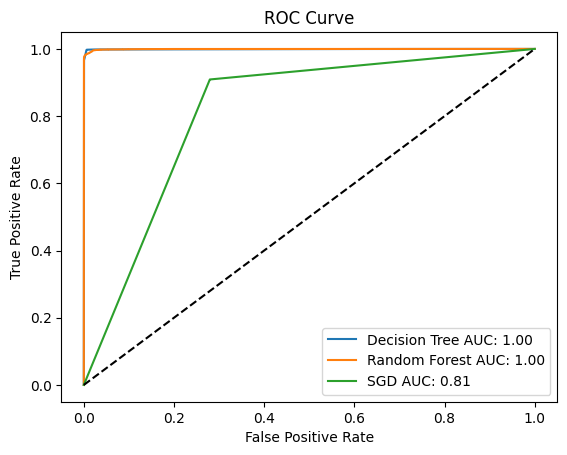

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ROC-AUC Curve

# Predict probabilities for each model in test data
tree_probs = grid_tree.best_estimator_.predict_proba(X_test)[:, 1]
forest_probs = grid_forest.best_estimator_.predict_proba(X_test)[:, 1]
sgd_probs = grid_sgd.best_estimator_.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
tree_auc_roc = roc_auc_score(y_test, tree_probs)
forest_auc_roc = roc_auc_score(y_test, forest_probs)
sgd_auc_roc = roc_auc_score(y_test, sgd_probs)

print("Decision Tree AUC ROC: ", tree_auc_roc)
print("Random Forest AUC ROC: ", forest_auc_roc)
print("SGD AUC ROC: ", sgd_auc_roc)

# Plot ROC curve
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, tree_probs)
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_test, forest_probs)
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_test, sgd_probs)

plt.figure()

plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree AUC: {tree_auc_roc:.2f}')
plt.plot(fpr_forest, tpr_forest, label=f'Random Forest AUC: {forest_auc_roc:.2f}')
plt.plot(fpr_sgd, tpr_sgd, label=f'SGD AUC: {sgd_auc_roc:.2f}')

plt.plot([0, 1], [0, 1], 'k--') # diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

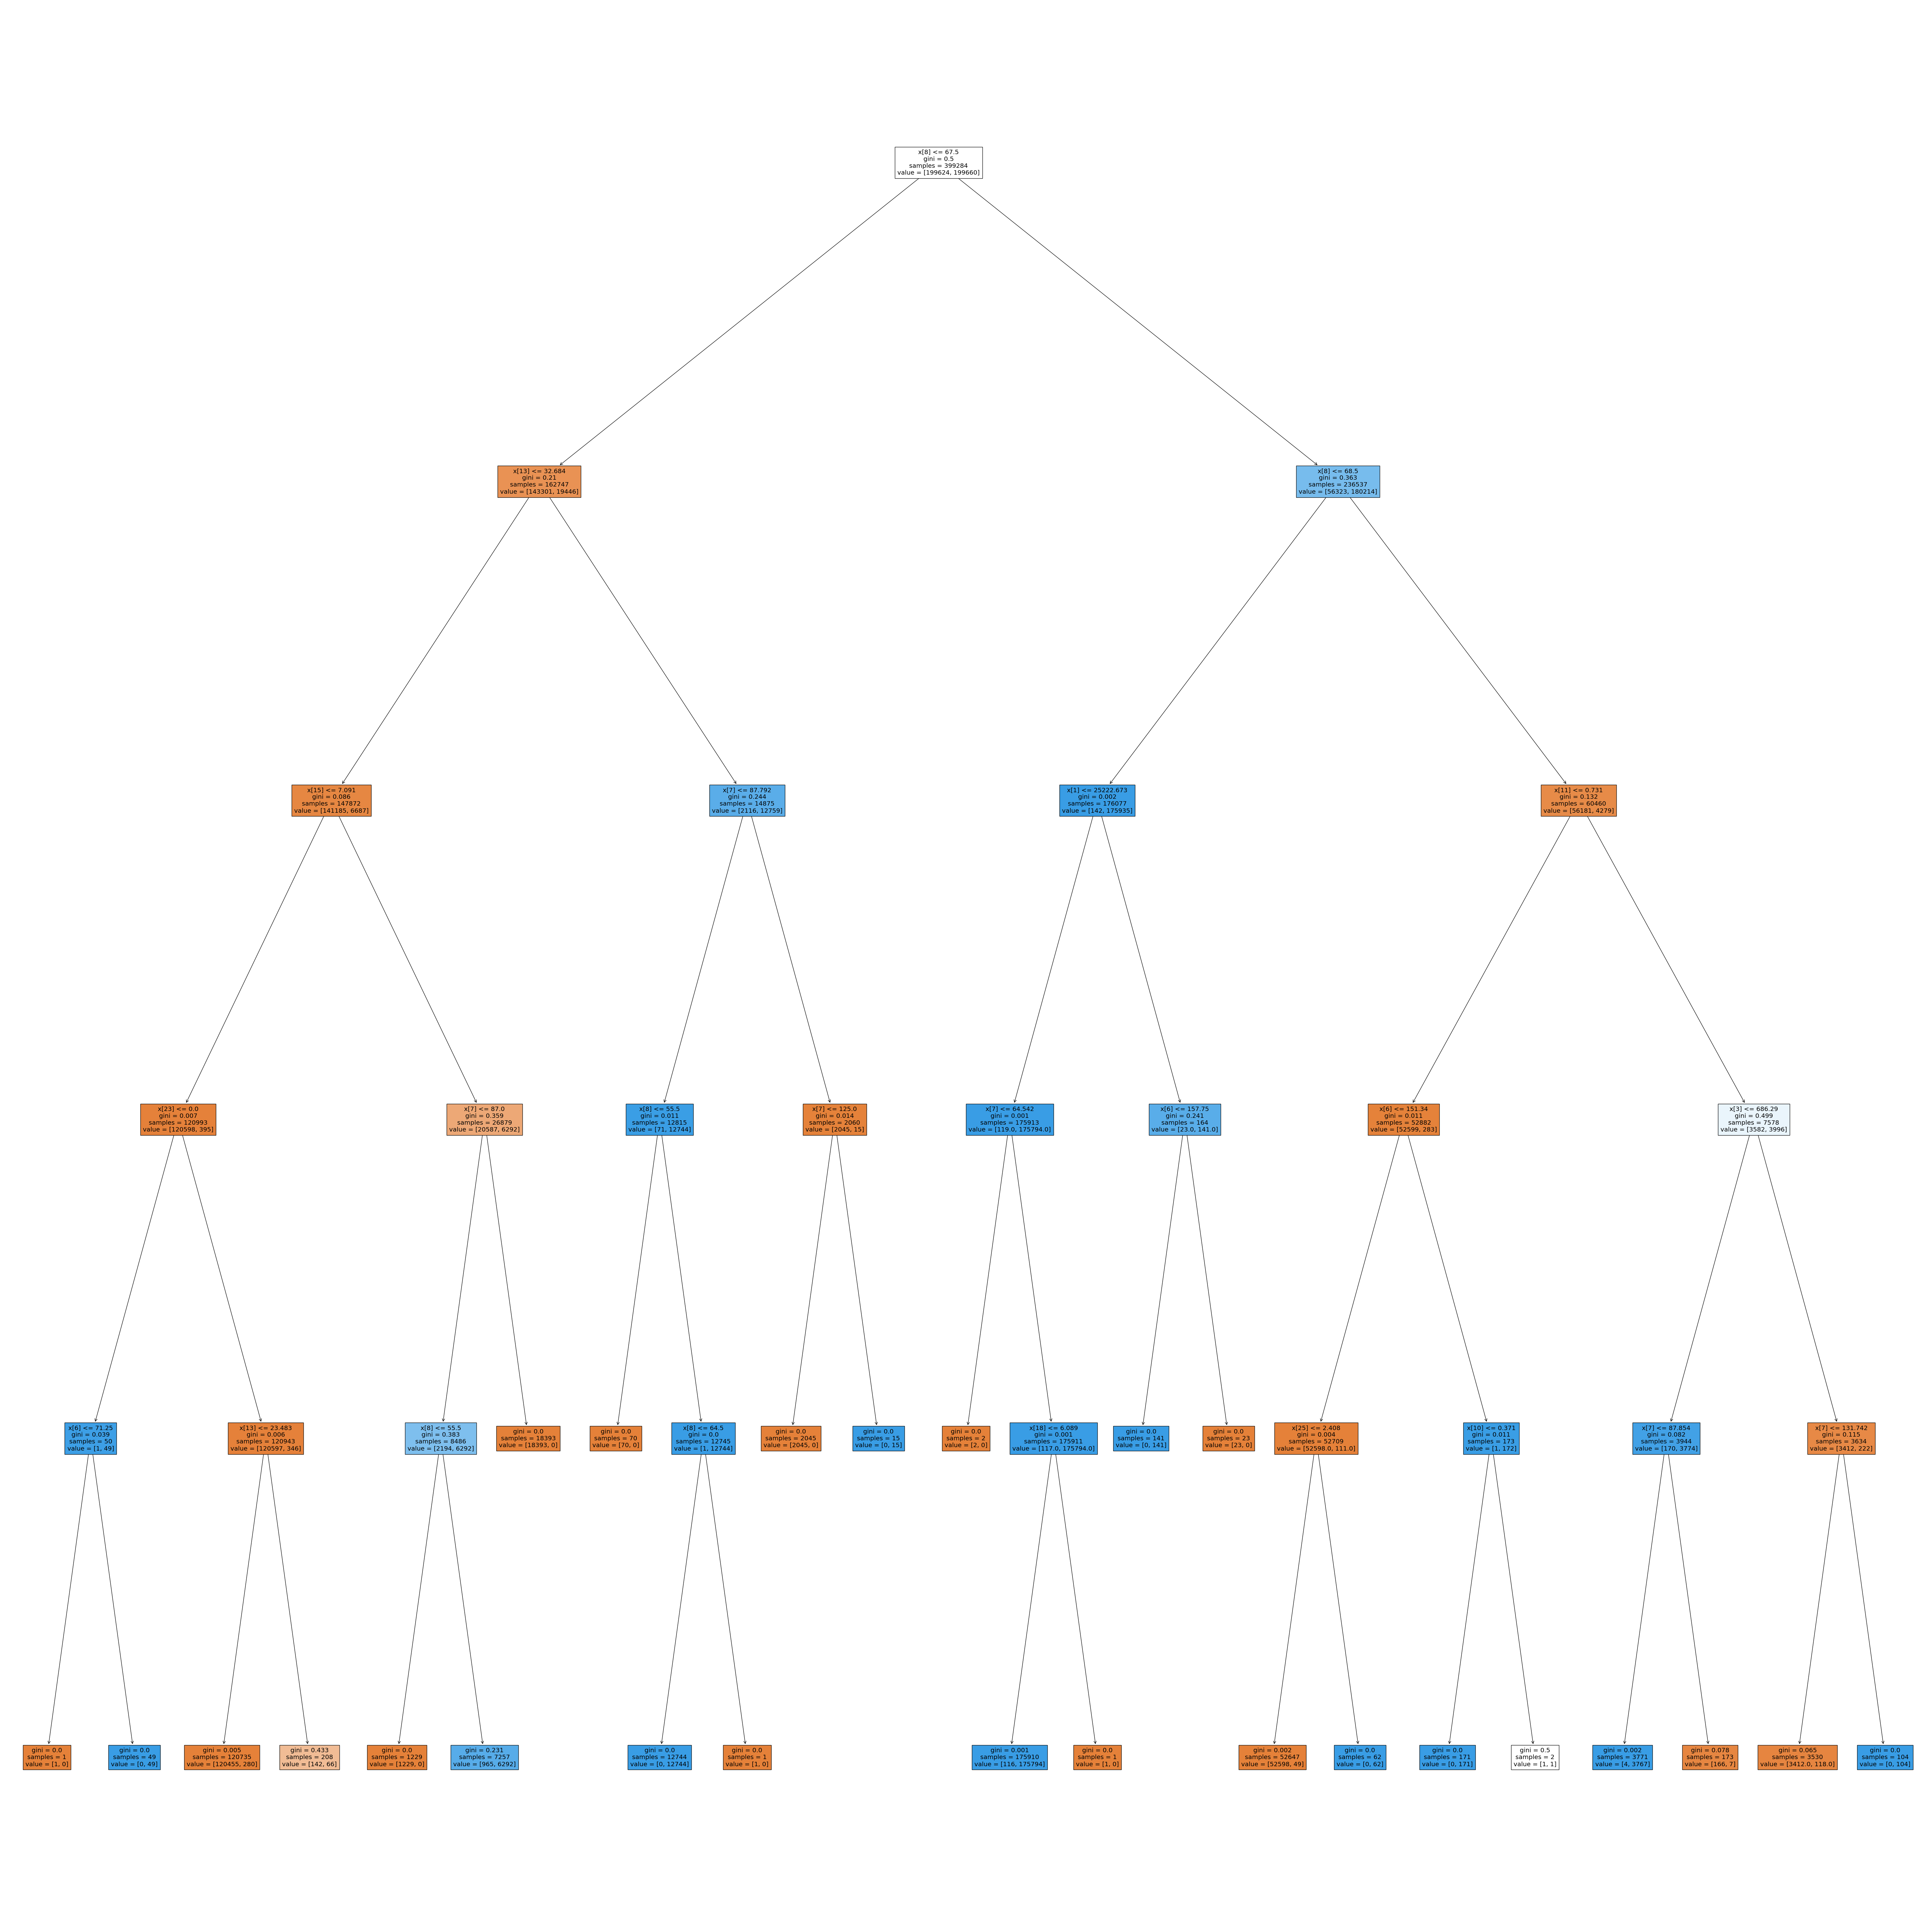

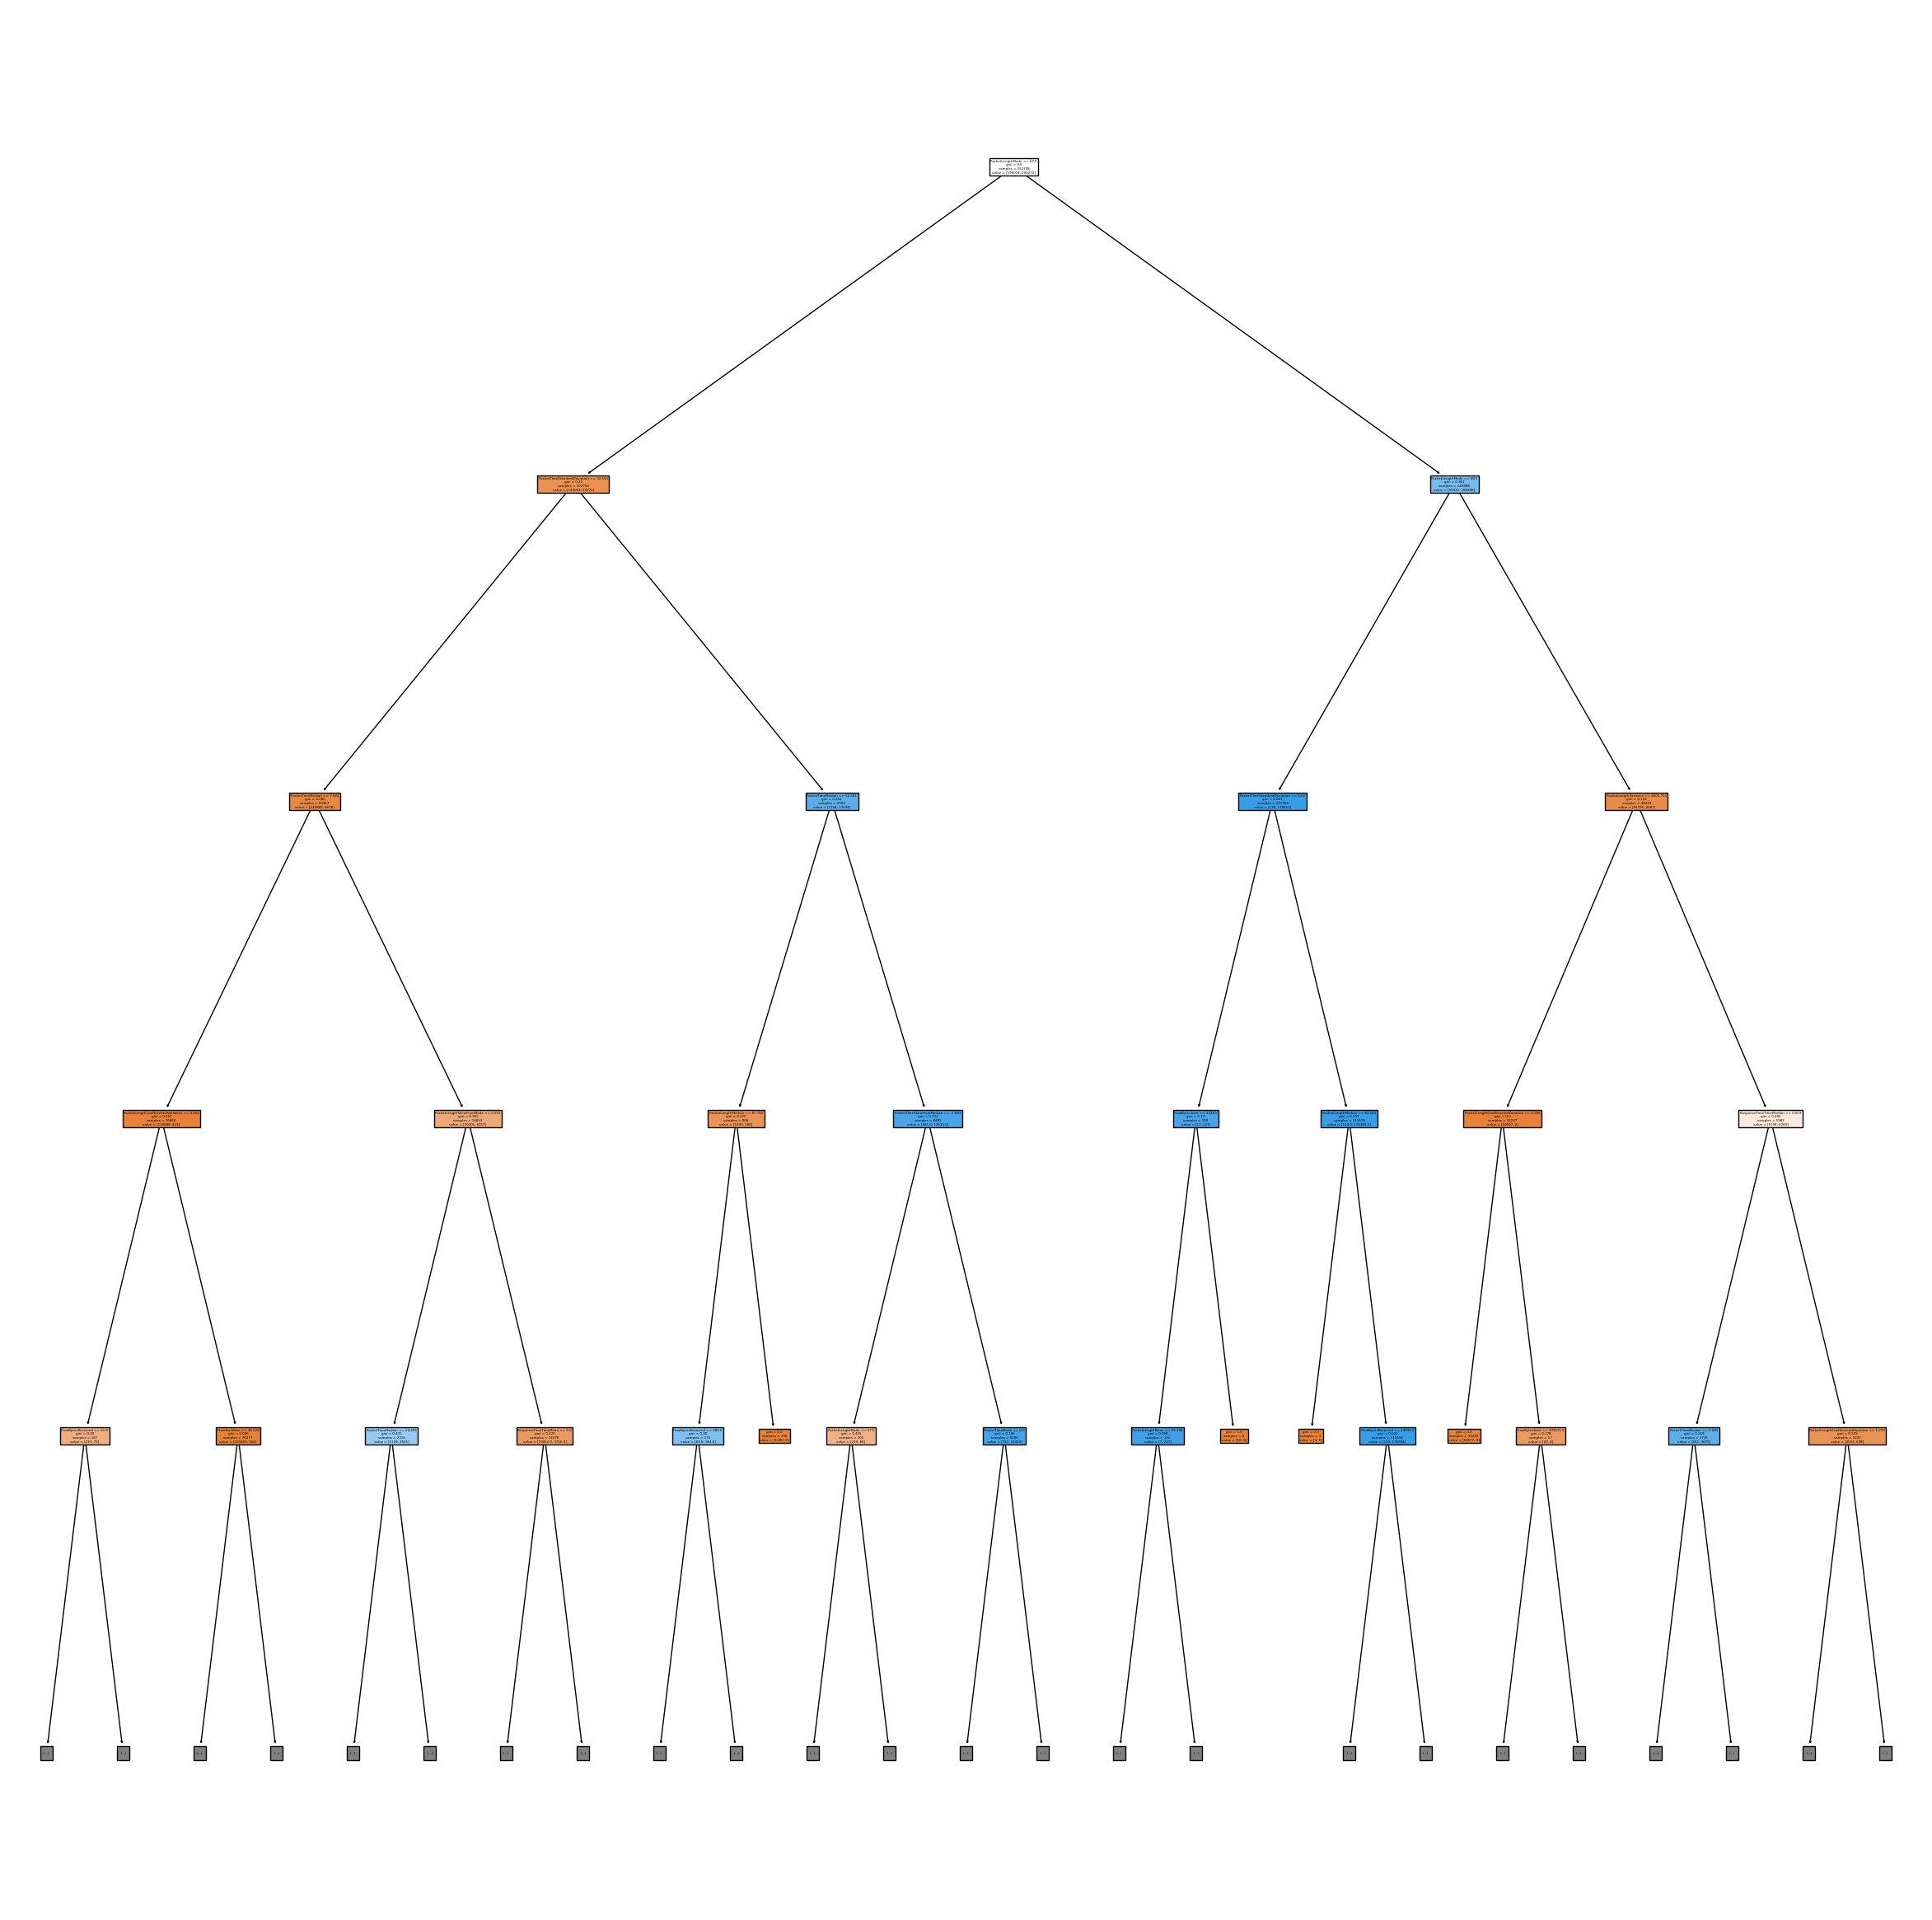

In [ ]:
from sklearn import tree

#Visualize 
plt.figure(figsize=(80,80))  
tree.plot_tree(tree_best_model, filled=True)
plt.show()

estimator = forest_best_model.estimators_[5]
plt.figure(figsize=(30,30))
tree.plot_tree(estimator, filled=True, feature_names = X.columns, max_depth=4)
plt.show()


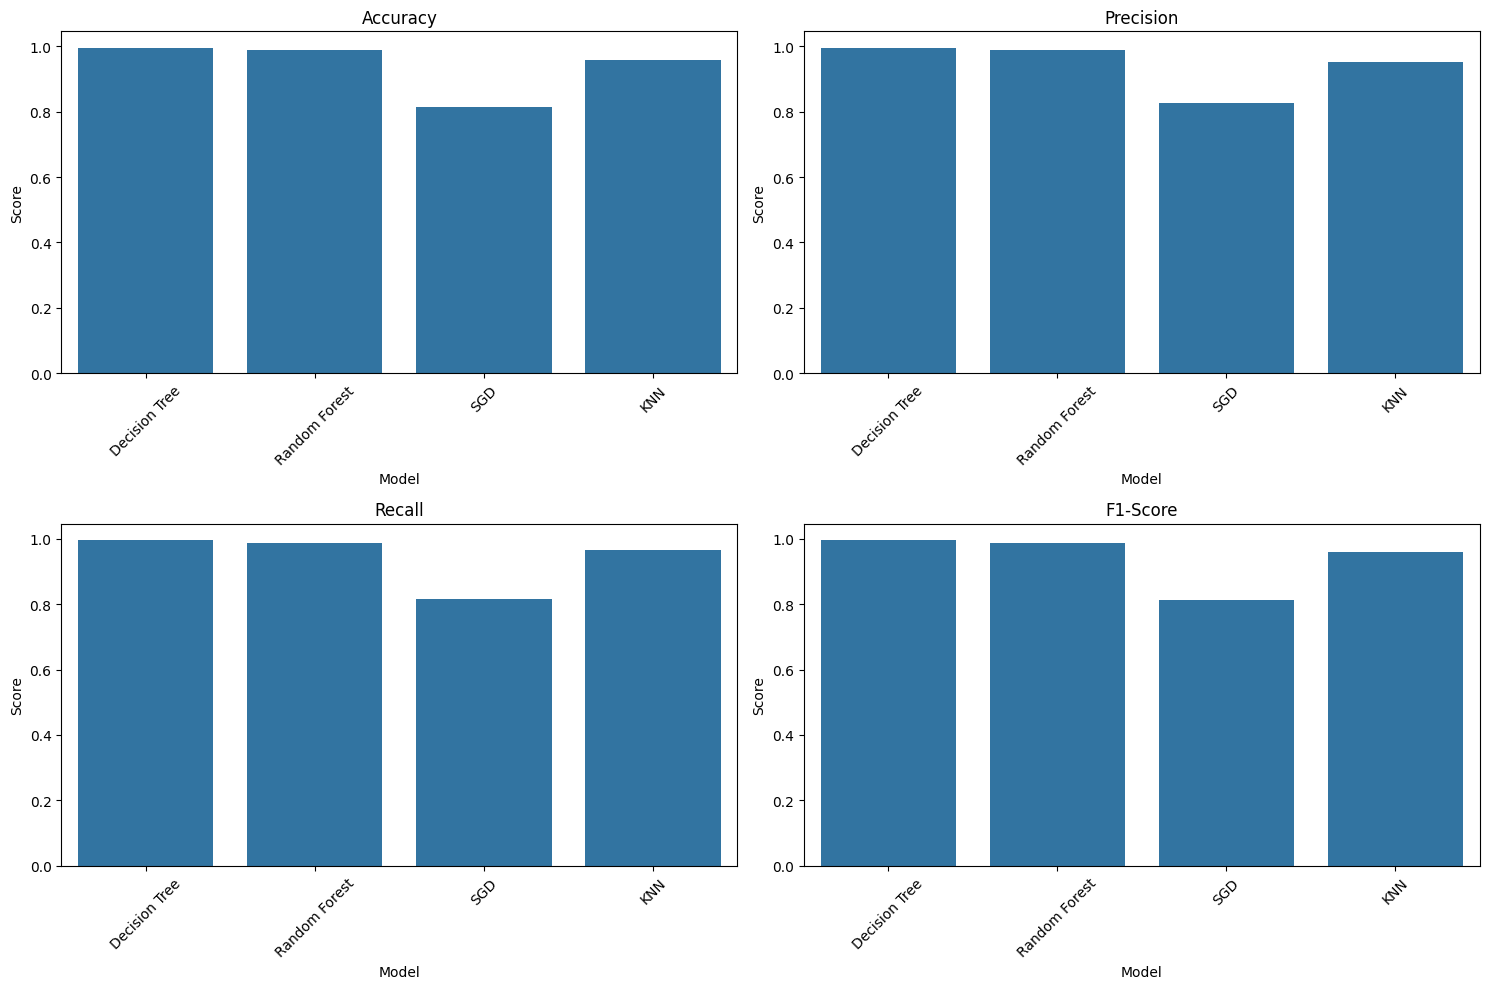

In [ ]:
import seaborn as sns

metrics = {'Accuracy': [tree_accuracy, forest_accuracy, sgd_accuracy, knn_accuracy], 
            'Precision': [tree_precision, forest_precision, sgd_precision, knn_precision],
            'Recall': [tree_recall, forest_recall, sgd_recall, knn_recall],
            'F1-Score': [tree_f1, forest_f1, sgd_f1, knn_f1]
            }
metrics_df = pd.DataFrame(metrics, index=['Decision Tree', 'Random Forest', 'SGD', 'KNN'])

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.barplot(ax=axes[0, 0], x=metrics_df.index, y=metrics_df['Accuracy'])
axes[0, 0].set_title('Accuracy')

sns.barplot(ax=axes[0, 1], x=metrics_df.index, y=metrics_df['Precision'])
axes[0, 1].set_title('Precision')

sns.barplot(ax=axes[1, 0], x=metrics_df.index, y=metrics_df['Recall'])
axes[1, 0].set_title('Recall')

sns.barplot(ax=axes[1, 1], x=metrics_df.index, y=metrics_df['F1-Score'])
axes[1, 1].set_title('F1-Score')

for ax in axes.flat:
    ax.set_ylabel('Score')
    ax.set_xlabel('Model')
    ax.set_xticks(range(len(metrics_df.index)))
    ax.set_xticklabels(metrics_df.index, rotation=45)

plt.tight_layout()
plt.show()
